In [1]:
#일급함수와 고차함수
#일급함수 -> 함수를 다른 객체와 동일하게 취급

#함수를 변수에 할당
licat = print
licat('헬로')

헬로


In [3]:
class Cat:
    def sound(self):
        print("애옹")
licat = Cat()
licat_sound = licat.sound
licat_sound()

애옹


In [4]:
l = [10,20,30]
la = l.append

la(40)
l

[10, 20, 30, 40]

In [6]:
# 함수를 데이터 구조에 저장

class Operator:
    def add(self,x,y):
        return x+y
    def sub(self,x,y):
        return x-y
    def mul(self,x,y):
        return x*y
    def div(self,x,y):
        return x/y
    def _and(self,x,y):
        return x&y
    def _or(self,x,y):
        return x|y


op = Operator()
logical_op = {
    'add' : op.add,
    'sub' : op.sub,
    'mul' : op.mul,
    'div' : op.div,
}
arithmetic_op = {
    '_and' : op._and,
    '_or' : op._or,
}

print(logical_op['add'](2,3))



5


In [7]:
#함수의 인자로 다른 함수에 전달 (콜백함수)

def licat_sound(p):
    # 무언가 10줄짜리 있음

    p('애옹')
licat_sound(print) #빌트 인 함수 넣음




In [8]:
def square(x):
    return x**2
def width_circle(r,s):
    return s(r)*3.14

width_circle(10,square)

314.0

In [10]:
#연습문제 - 피타고라스 정리 a^2 + b^2 = c^2 쓰기
def square(x):
    return x**2
def root(x):
    return x**0.5


def length(a,b,square, root):
    return root(square(a)+square(b))


length(6,8,square,root)

10.0

In [11]:
# 함수를 결과로 반환


def create_adder(x):
    def adder(y):
        return x + y
    return adder

add_5 = create_adder(5)
print(add_5(10))  # 출력: 15

#항상 5가 더해지도록

15


In [13]:
def f(x):
    def ff(y):
        return y**x
    return ff

exponent_2 = f(2) # 항상 제곱 ff
exponent_3 = f(3) # 항상 세제곱 ff
print(exponent_2(10)) # print(f(10)) => return y **2
print(exponent_3(10)) # print(f(10)) => return y **3
#변수를 감추기? 는 맞긴함 하지만, 완전한 보호는 불가



100
1000


In [15]:
def f():
    l = [10, 20, 30]
    print(id(l))
    return l

sample = f()
id(sample) #주소가 같다. -> 휘발되지 않은 이유는?
# l이 참조중 이라서?

138853767934272


138853767934272

In [16]:
import sys

sys.getrefcount(sample) # 참조 카운트가 0이 되면 삭제 대상이 되고, 삭제 사이클이 지날 때 삭제됨
# ???-> OS에 따라서 참조값이 또 다르다

3

In [ ]:
# 일급 함수 : 함수를 일급 객체(값, 주소)로 취급
# 고차함수 : 함수를 아규먼트로 받거나, return으로 반환하는 함수



In [ ]:
#클로저 : 휘발 되었어야 하는 메모리 영역에 접근하여 함수나 데이터를 활용하는 일

# 클로저인 경우
def outer_function(x):
    def inner_function(y):
        return x + y
    return inner_function

# 함수가 종료되면 x가 휘발되었어야 하지만, return x+y에서 쓰고 있으므로 휘발되지 않음

#실무에선 별로 사용하지 않는다 -> 유지보수 성에서 떨어지므로 그닥?
# 데이터 은닉과 데코레이터에 필수적이므로, 이 경우엔 사용


In [ ]:
# 데코레이터
# [@decorator_function] 로 선언


def simple_decorator(function):
    def wrapper():
        print("Before the function call")
        function()
        print("After the function call")
    return wrapper

@simple_decorator # 데코레이터 선언
def hello():
    print("Hello, World!")

hello() # 데코레이터가 없는 상태에서는 simple_decorator(hello)() 와 같습니다.
#simple_decorator(hello)() => wrapper()

#실무에서 꽤 많이 사용한다.



In [17]:
# 데코레이터 예시

# step 1
def data_Preprocessing(function):
    def wrapper():
        pass
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # TypeError 발생



TypeError: ignored

In [18]:
# step 2
def data_Preprocessing(function):
    def wrapper(data):
        print(data)
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # 데이터만 출력하고 함수는 None을 반환

[1, 2, '3', 4, '5']


In [ ]:
# step 3
def data_Preprocessing(function):
    def wrapper(data):
        return function(list(map(int, data)))
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # 출력: 3.0 (정상 작동)

#data_preprocessing(mean)(data) => wrapper(data)
#여기에선, mean만 function으로 들어가고, data는 따로 wrapper로 들어감

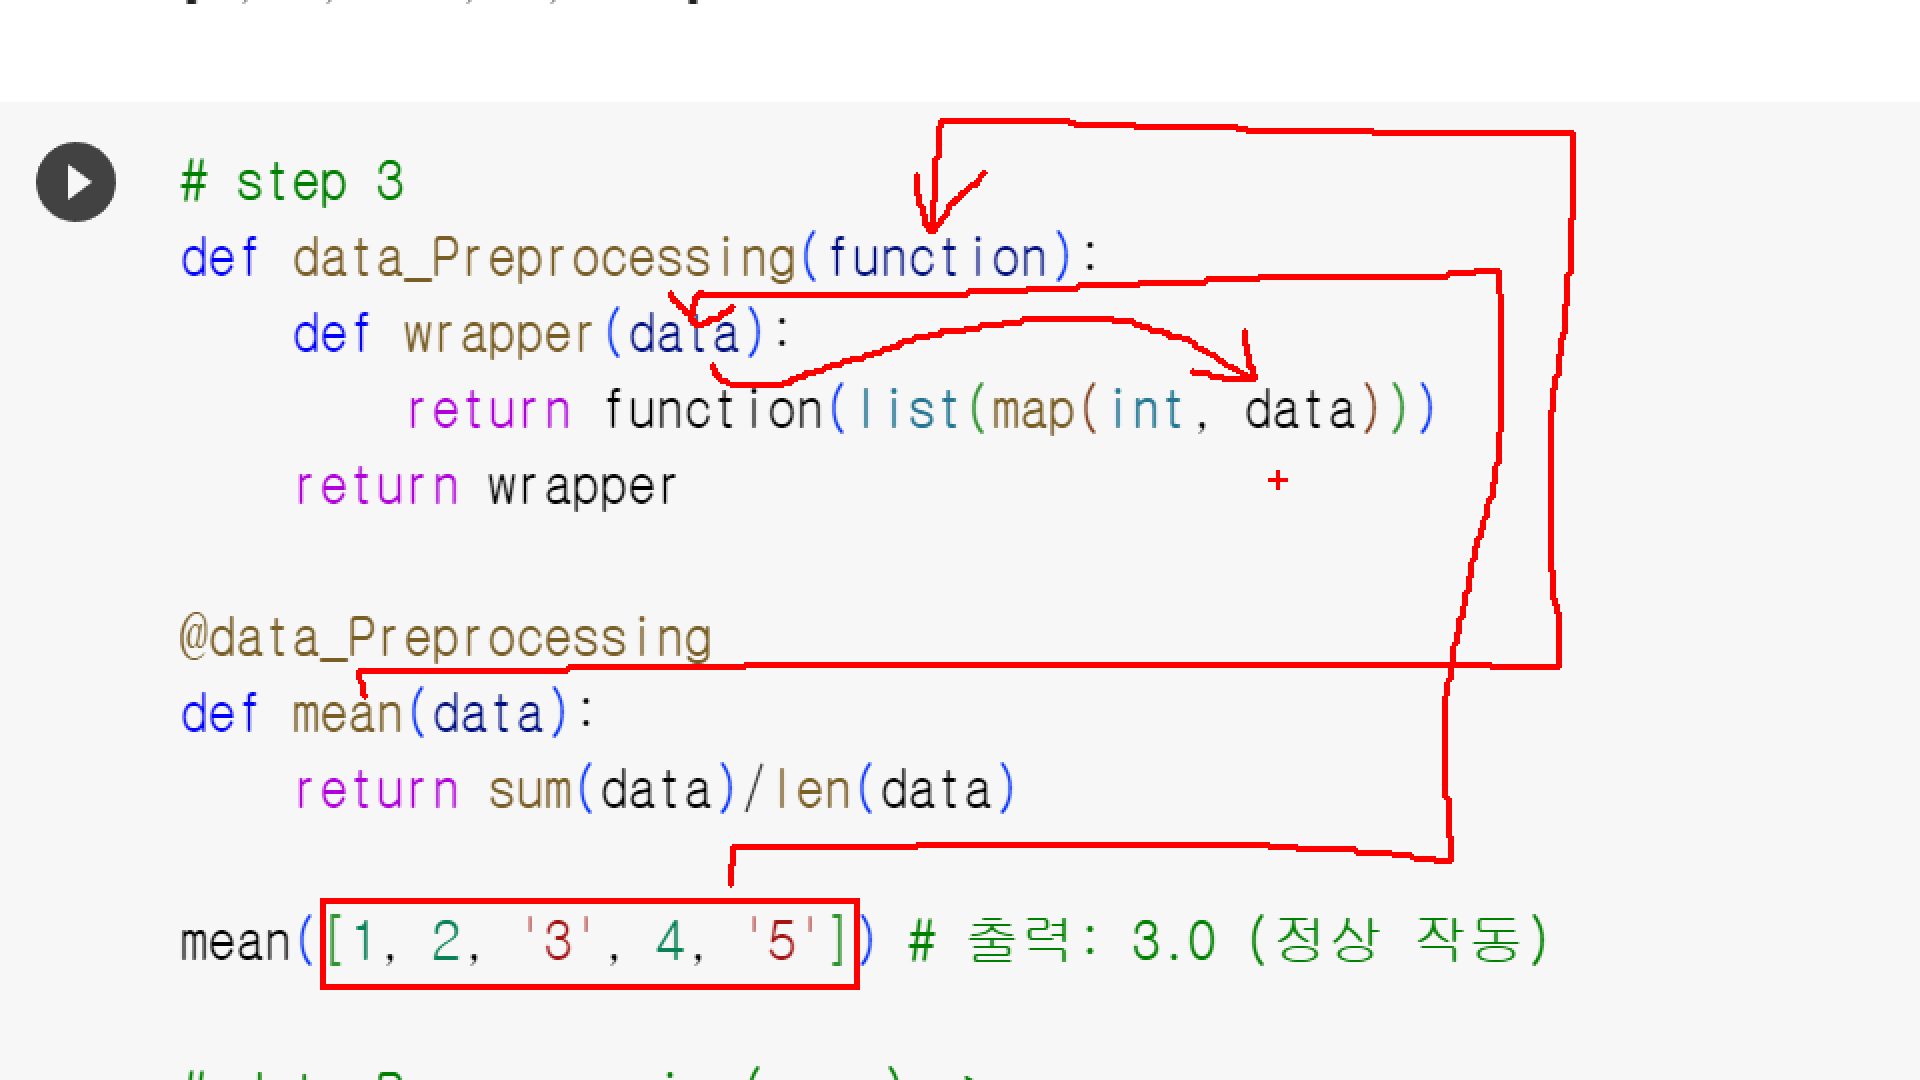

In [ ]:
# 실사용 예시?

#login 한 사용자만 읽도록하기
# 대부분 이미 구현되어있다.
def login():
    pass

@login
def 게시판읽기():
    pass



In [21]:
#중첩 데코레이터

def add_exclamation(function):
    def wrapper(text):
        print(f'add_exclamation 데코레이터 시작')
        result = function(text) + "!"
        print(f'add_exclamation 데코레이터 종료')
        return result
    return wrapper

def add_question_mark(function):
    def wrapper(text):
        print(f'add_question_mark 데코레이터 시작')
        result = function(text) + "?"
        print(f'add_question_mark 데코레이터 종료')
        return result
    return wrapper

def add_dot(function):
    def wrapper(text):
        print(f'add_dot 데코레이터 시작')
        result = function(text) + "."
        print(f'add_dot 데코레이터 종료')
        return result
    return wrapper

@add_exclamation
@add_question_mark
@add_dot
def greet(message):
    print('greet실행')
    return message

result = greet('안녕')
print(result)

add_exclamation 데코레이터 시작
add_question_mark 데코레이터 시작
add_dot 데코레이터 시작
greet실행
add_dot 데코레이터 종료
add_question_mark 데코레이터 종료
add_exclamation 데코레이터 종료
안녕.?!


In [22]:
#동적 데코레이터

def add(n): # 데코레이터를 감싸는 하나의 함수를 더 만들어서 아규먼트를 받는 방법입니다.
    def decorator(function): # 여기서부터의 기능은 같습니다.
        def new_function(a, b):
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 시작됩니다.')
            result = function(a, b)
            print(result)
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 종료됩니다.')
            return result + n
        return new_function
    return decorator

@add(1000)
def plus(a, b):
    print('plus 함수가 호출되었습니다.')
    return a + b

result = plus(10, 20)
print(f'result : {result}')

plus 함수가 1000만큼 증가시키는 데코레이터가 시작됩니다.
plus 함수가 호출되었습니다.
30
plus 함수가 1000만큼 증가시키는 데코레이터가 종료됩니다.
result : 1030


In [23]:
# 람다 - 일회성으로 쓸 때 쓰는 함수 표현방식

sq = lambda x:x**2
print(sq(10))

100


In [ ]:
#가변 아규먼트, 가변 키워드 아규먼트 args, kwargs

# *을 붙임으로서 선언. *은 포인터가 아니라 '언패킹 연산자'

#'가변' 이라는 의미 그대로 여러개 갯수를 넣을 수 있다. 튜플로 들어감.

def print_args(*args):
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat')





In [ ]:
def print_args(a, b, *args, c): # *args뒤에 일반 변수를 선언하지 못합니다. 에러
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 10)



In [ ]:
def print_args(a, b, *args, *c): # *args뒤에 또다른 가변 아규먼트를 넣지 못합니다. 에러
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 10)

In [ ]:
## ** 두개 짜리는 딕셔너리로 가변인수 받기

def print_kwargs(a, **kwargs):
    print(a)
    print(kwargs)
    for i in kwargs:
        print(i)

print_kwargs(100, name='Licat', age='10')

In [24]:
kwargs = {'a': 1, 'b': 2, 'c': 3}
print(kwargs, *kwargs)
# print(kwargs, **kwargs) # 왜 에스터리스크가 2개일 때 error가 날까요?
# print(kwargs, a=1, b=2, c=3) # 이 코드가 바로 위의 코드와 같습니다.

{'a': 1, 'b': 2, 'c': 3} a b c


In [26]:
class MyIterator:
    def __init__(self, stop):
        self.current_value = 0  # 현재 값
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_value >= self.stop:

            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

0
1
2
3
4
멈춥니다


In [27]:
class MyIterator:
    def __init__(self, stop):
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        self.current_value = 0  # 현재 값
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

for i in my_iterator:
    print(i)

0
1
2
3
4
0
1
2
3
4


In [ ]:
## https://pythontutor.com/python-debugger.html#mode=edit 에서 구현 순서 보기

class MyIterator:
    def __init__(self, stop):
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        self.current_value = 0  # 현재 값
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)





In [ ]:
# 제너레이터

def my_generator(data):
    for i in data:
        yield i

my_list = [1, 2, 3, 4, 5]
my_iterator = my_generator(my_list)

for i in my_iterator:
    print(i)

In [35]:
def my_generator(data):
    for i in data:
        yield i * 10

for i in my_generator([1, 2, 3]):
    print(i)

10
20
30


In [ ]:
# 이럴때 많이 사용합니다.
def my_generator():
    l = ['짝', '홀']
    while True:
        yield l[t := False]
        yield l[t := True]

list(zip([0, 1, 2, 3, 4, 5, 6], my_generator()))

In [ ]:
def my_generator():
    count = 0
    while True:
        yield count
        count += 2
list(zip([1, 2, 3, 4, 5, 6, 7, 8, 9], 'hello world', my_generator())) # 마치 enumerate처럼

In [40]:
# 회전초밥집에 들어갔습니다. 초밥은 아래와 같은 양식으로 나옵니다.
# [['광어초밥', 1000], ['연어초밥', 2000], ['계란초밥', 3000]]
# * 각 초밥은 몇 개 나올지 알 수 없습니다.
# * 각 초밥은 1000원씩 비싸집니다.
# * 초밥에 '어'가 나오는 초밥만 먹습니다.
# 내가 먹은 초밥의 비용을 계산하는 코드를 작성해 주세요.
def my_generator(data):
    for i,j in data:
        if '어' in i:
           yield j

def solution(data):
    n = 0
    for i in my_generator(data):
        n += i
    return n

print(solution([['광어초밥', 1000], ['연어초밥', 2000], ['계란초밥', 3000], ['문어초밥', 4000], ['장어초밥', 5000]]))
def sol(data):
    return sum(my_generator(data)) # sum이 통하므로 이걸 쓰는게 간단하고 좋다
print(sol([['광어초밥', 1000], ['연어초밥', 2000], ['계란초밥', 3000], ['문어초밥', 4000], ['장어초밥', 5000]]))

12000
12000


In [41]:
# nonlocal 선언시 바깥의 전역변수가 아닌 내부의 변수를 가리키게 됨

x = 100
def outer():
    x = 1
    def inner():
        nonlocal x
        x += 1
        print(x) # 출력: 2
    inner()
    print(x) # 출력: 2

outer()
print(x) # 출력: 100

2
2
100


In [ ]:
#global 사용시 바깥의 x를 가리킴

x = 100
def outer():
    x = 1
    def inner():
        global x
        x += 1
        print(x) # 출력: 101
    inner()
    print(x) # 출력: 1

outer()
print(x) # 출력: 101

In [116]:
# 문제1
# 다음과 같이 동작하는 제너레이터 함수 fibonacci(n)를 완성하세요.
# 주어진 숫자 n까지의 피보나치 수열을 반환합니다.
# 인터넷에서 피보나치 순열 Python 코드를 검색해보셔도 좋습니다.
def fib_gen(n):
    a,b =1,1
    for _ in range(n):
        yield a
        a,b = b,a+b


for i in fib_gen(9):
    print(i)


# 출력
# 1
# 1
# 2
# 3
# 5







1
1
2
3
5
8
13
21
34


In [115]:
# 문제2
# 주어진 함수의 실행 시간을 측정하여 출력하는 데코레이터 time_it를 작성하세요.
# (힌트: time 모듈의 time() 함수를 사용하세요.)

import time

def time_it(f):
    def wrap(n):
        start = time.time()
        f(n)
        end = time.time()
        t = end-start
        print(t)

    return wrap


def fib_gen(n):
    a,b =1,1
    for _ in range(n):
        yield a
        a,b = b,a+b
    return a


@time_it
def fib10():
    for i in fib_gen(10):
        print(i)

fib10()


#강사님이 푼 해답에서는, main함수를 따로 두어서 그 위에 @를 붙였다.


1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
0.01965475082397461
